# **Introduction**
Dogecoin Price Prediction with Prophet

Dogecoin is an altcoin that was first introduced on 6 Dec 2013. It is also known as the first "meme" coin. With the crypto crashes in 2022, the market cap of Dogecoin has fallen from USD 88 billion (Nov 2021 peak), to its current market cap of USD 8 billion. Hence, predicting its price is difficult.

In this project, I will be using Prophet to predict the price of DOGE coin.

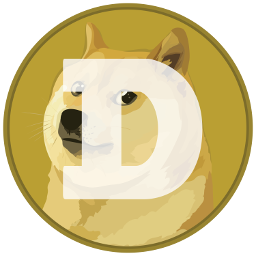

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import date

In [ ]:
doge_df = yf.download('doge-usd')

Note that you are able to set other parameters in the yfinance.download function such as:
1. Start (default is 1900-01-01) and End dates (default is now)
2. Intervals (default is 1d): 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo

# **Exploratory Data Analysis**

In [ ]:
doge_df.head()

In [ ]:
doge_df.tail()

In [ ]:
doge_df.info()

In [ ]:
# Adding date into the column
doge_df.reset_index(inplace=True)
doge_df = doge_df.rename (columns = {'index':'Date'})

doge_df.info()

In [ ]:
# Checking for any missing values
doge_df.isnull().sum()

In [ ]:
# Looking at the trend of DOGE price over time
dogeprice_df = doge_df[['Date','Open']]
dogeprice_df['Percent Change'] = dogeprice_df['Open'].pct_change() * 100

In [ ]:
dogeprice_df.sort_values('Percent Change').head()

In [ ]:
dogeprice_df.sort_values('Percent Change').tail()

In [ ]:
fig1 = px.line(dogeprice_df, x='Date', y='Open', title= 'DOGE Price over Time')
fig1.add_annotation(x='2021-01-29', y='0.043734', text="Reddit meme<br>484% increase", showarrow=True, arrowhead=1, align='left')
fig1.add_annotation(x='2021-04-17', y='0.366098', text="Twitter sentiment<br>102% increase", showarrow=True, arrowhead=1, align='left')
fig1.show()

Key Observations:
1. There are two major spikes in Jan 2021 and Apr 2021 that may influence our Prophet model. For more information on the important DOGE events: 
https://www.tradingview.com/symbols/DOGEUSD/history-timeline/
2. Before May 2021, fluctuations in price exaggerates with time. The ampitude of seasonal activity increases which implies a multiplicative time series.

# **Price Prediction with Prophet**

Prophet is a open source forecasting procedure implemented in R and Python. It is an additive regression model with four main components:
1. A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
2. A yearly seasonal component modeled using Fourier series.
3. A weekly seasonal component using dummy variables.
4. A user-provided list of important holidays.

Source: https://research.facebook.com/blog/2017/02/prophet-forecasting-at-scale/

Piecewise linear regression is a form of regression that allows multiple linear models to be fitted to the data for different ranges of X. The regression function at the breakpoint may be discontinuous, but it is possible to specify the model such that the model is continuous at all points.

A Fourier series is a sum that represents a periodic function as a sum of sine and cosine waves. The frequency of each wave in the sum, or harmonic, is an integer multiple of the periodic function's fundamental frequency.

In [ ]:
dogemodel_df = doge_df[['Date','Open']]
dogemodel_df = dogemodel_df.rename(columns={'Date':'ds', 'Open':'y'}) 
m = Prophet(seasonality_mode='multiplicative')
m.fit(dogemodel_df)

In [ ]:
future = m.make_future_dataframe(periods=365)
future['cap']=0
forecast = m.predict(future)
plot_plotly(m,forecast)

In [ ]:
# Predict the DOGE price on a certain date
predict_date = input("Input a date:")
forecast[forecast['ds'] == predict_date]['yhat'].item()

In [ ]:
plot_components_plotly(m,forecast)

**Conclusions from the Prophet Model**
1. There is a downward trend for the price of DOGE coin.
2. The price of DOGE is highest in May on a Saturday.
3. The price of DOGE is lowest in August on a Wednesday.

# **Moving the Project Forward**

1. Performing hyperparameter tuning to optimise the price prediction model.
2. Performing additional analysis beyond price and Prophet to support Buy or No Buy decisions. Examples:
a) Scraping tweets or reddit posts to analyze social trends to predict its impact on DOGE prices
b) Analyzing changes in FED interest rate and its impact on DOGE prices